In [246]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [247]:
# Before this have filtered data like extracting data for as many African countries as possible, data cleaning which includes dealing with
# removing excessive data, modifying data types and analysing all data and merging the data on basis of year and region and finally making
# pairs of data files such as "CO2_Energy.csv", "CO2_Endangered.csv", "Population_Endangered.csv"

In [248]:
#Data Loading and some manipulation

co2_ener = pd.read_csv("CO2_Energy.csv")
co2_endang = pd.read_csv("CO2_Endangered.csv")
pop_endang = pd.read_csv("Population_Endangered.csv")

co2_ener = co2_ener[['Region/Country/Area',	'Year', 'Emissions (thousand metric tons of carbon dioxide)', 'Primary energy production (petajoules)']]

def remove_comma(x):
  return x.replace(',', '')

co2_ener["Emissions (thousand metric tons of carbon dioxide)"] = co2_ener["Emissions (thousand metric tons of carbon dioxide)"].apply(remove_comma)
co2_ener["Emissions (thousand metric tons of carbon dioxide)"] = co2_ener["Emissions (thousand metric tons of carbon dioxide)"].astype(int)
co2_ener["Primary energy production (petajoules)"] = co2_ener["Primary energy production (petajoules)"].apply(remove_comma)
co2_ener["Primary energy production (petajoules)"] = co2_ener["Primary energy production (petajoules)"].astype(int)
co2_ener["Year"] = co2_ener["Year"].astype(str)

co2_endang = co2_endang[['Region/Country/Area',	'Year', 'Emissions (thousand metric tons of carbon dioxide)', 'Threatened Species: Total (number)']]
co2_endang["Year"] = co2_endang["Year"].astype(str)

pop_endang = pop_endang[['Region/Country/Area',	'Year', 'Population mid-year estimates (millions)','Population density', 'Threatened Species: Total (number)']]
pop_endang["Year"] = pop_endang["Year"].astype(str)


In [249]:
# Merging all modified data files on basis of years and regions

co2_endang_copy = co2_endang.copy()
co2_endang_copy = co2_endang_copy.drop('Emissions (thousand metric tons of carbon dioxide)', axis = 1)
pop_endang_copy = pop_endang.copy()
pop_endang_copy = pop_endang_copy.drop('Threatened Species: Total (number)', axis = 1)
merged_df = pd.merge(co2_ener, co2_endang_copy, on=['Region/Country/Area', 'Year'], how='inner')
final_merged_df = pd.merge(merged_df, pop_endang_copy, on=['Region/Country/Area', 'Year'], how='inner')
print(len(final_merged_df))
final_merged_df.head()

58


,Region/Country/Area,Year,Emissions (thousand metric tons of carbon dioxide),Primary energy production (petajoules),Threatened Species: Total (number),Population mid-year estimates (millions),Population density
0,Algeria,2010,96452,6200,105,35.86,15.1
1,Algeria,2015,131690,5883,114,39.54,16.6
2,Angola,2010,15863,4016,117,23.36,18.7
3,Angola,2015,23293,4030,130,28.13,22.6
4,Benin,2010,5148,82,62,9.45,83.8


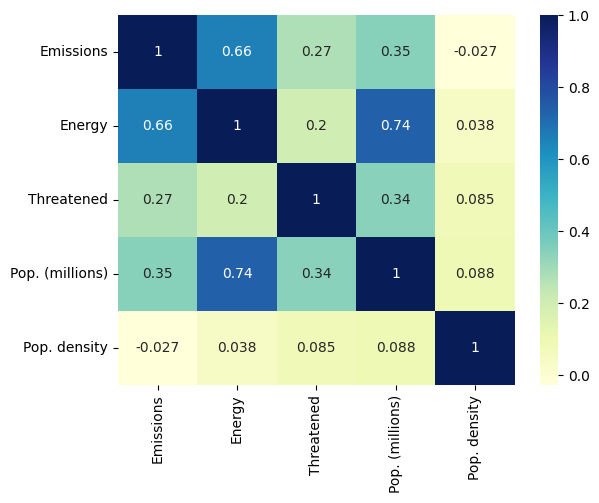

In [250]:
# Showing correlation between all factors affecting environment using heatmaps

# Emissions with Energy produced have high correlation btw them where as Emissions with Population and Threatened species have low correlation.
# Energy produced and Population have very high correlation btw them
# Threatened Species and Emissions have low correlation btw them

final_merged_df1 = final_merged_df[['Emissions (thousand metric tons of carbon dioxide)', 'Primary energy production (petajoules)',
                                  'Threatened Species: Total (number)','Population mid-year estimates (millions)','Population density']]
final_merged_df1.columns = ['Emissions', 'Energy', 'Threatened', 'Pop. (millions)', 'Pop. density']
corr_table = final_merged_df1.corr()
sb.heatmap(corr_table, cmap="YlGnBu", annot=True)
plt.show()

In [251]:
# Describing modified Data files

In [252]:
co2_ener.head(5)

,Region/Country/Area,Year,Emissions (thousand metric tons of carbon dioxide),Primary energy production (petajoules)
0,Algeria,2005,78045,7534
1,Algeria,2010,96452,6200
2,Algeria,2015,131690,5883
3,Algeria,2017,131701,6285
4,Algeria,2018,138496,6254


In [253]:
co2_ener.describe()

,Emissions (thousand metric tons of carbon dioxide),Primary energy production (petajoules)
count,176.000000,176.000000
mean,31975.414773,1266.897727
std,79466.083551,2394.076817
min,617.000000,10.000000
25%,3937.500000,96.750000
50%,7947.500000,413.500000
75%,18599.000000,814.000000
max,440028.000000,10795.000000


In [254]:
co2_endang.head(5)

,Region/Country/Area,Year,Emissions (thousand metric tons of carbon dioxide),Threatened Species: Total (number)
0,Algeria,2005,78045,50
1,Algeria,2010,96452,105
2,Algeria,2015,131690,114
3,Algeria,2019,143586,145
4,Angola,2005,7510,76


In [255]:
co2_endang.describe()

,Emissions (thousand metric tons of carbon dioxide),Threatened Species: Total (number)
count,118.000000,118.000000
mean,30731.644068,196.186441
std,77970.542740,200.902789
min,617.000000,15.000000
25%,3878.000000,75.250000
50%,7538.000000,130.000000
75%,17122.000000,230.500000
max,440028.000000,1174.000000


In [256]:
pop_endang.head(5)

,Region/Country/Area,Year,Population mid-year estimates (millions),Population density,Threatened Species: Total (number)
0,Algeria,2010,35.86,15.1,105
1,Algeria,2015,39.54,16.6,114
2,Algeria,2020,43.45,18.2,155
3,Algeria,2022,44.90,18.9,180
4,Angola,2010,23.36,18.7,117


In [257]:
pop_endang.describe()

,Population mid-year estimates (millions),Population density,Threatened Species: Total (number)
count,117.000000,117.000000,117.000000
mean,31.486154,77.847009,258.290598
std,40.019896,115.856579,260.314666
min,1.090000,2.600000,18.000000
25%,6.300000,21.600000,107.000000
50%,19.880000,48.200000,161.000000
75%,37.460000,83.900000,294.000000
max,218.540000,640.100000,1464.000000


In [258]:
# Length of all files

print(len(co2_ener))
print(len(co2_endang))
print(len(pop_endang))

176
118
117


In [259]:
df4 = co2_ener.groupby('Year').sum()
df4 = df4.reset_index()
df4


,Year,Emissions (thousand metric tons of carbon dioxide),Primary energy production (petajoules)
0,2005,721724,34507
1,2010,836343,35989
2,2015,983977,37704
3,2017,1008514,38132
4,2018,1022159,38248
5,2019,1054956,38394


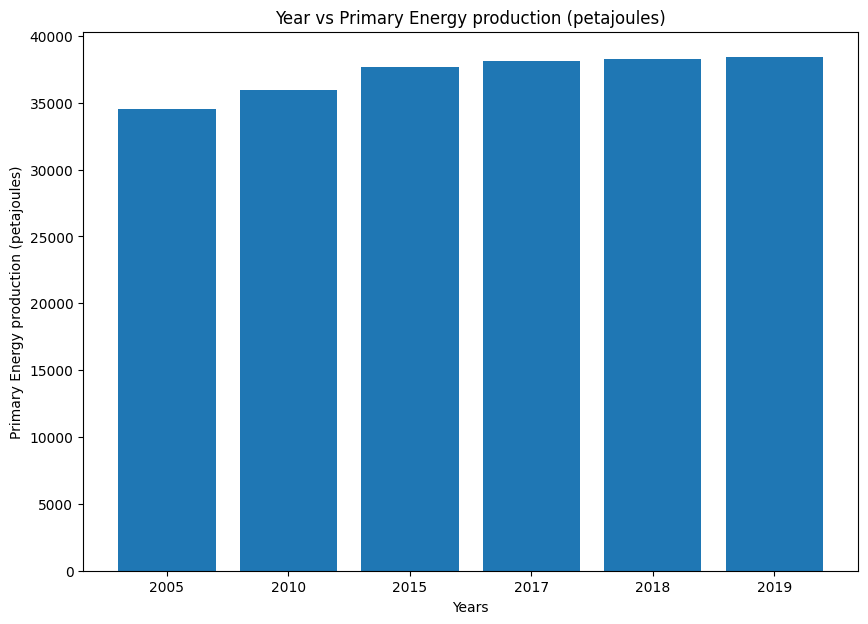

In [260]:
# Graph shows how the Energy Produced in Africa has been increasing gradually with time

fig = plt.figure(figsize =(10, 7))
plt.bar(df4["Year"],df4["Primary energy production (petajoules)"])
# Adding labels and a title
plt.xlabel('Years')
plt.ylabel('Primary Energy production (petajoules)')
plt.title('Year vs Primary Energy production (petajoules)')
plt.show()

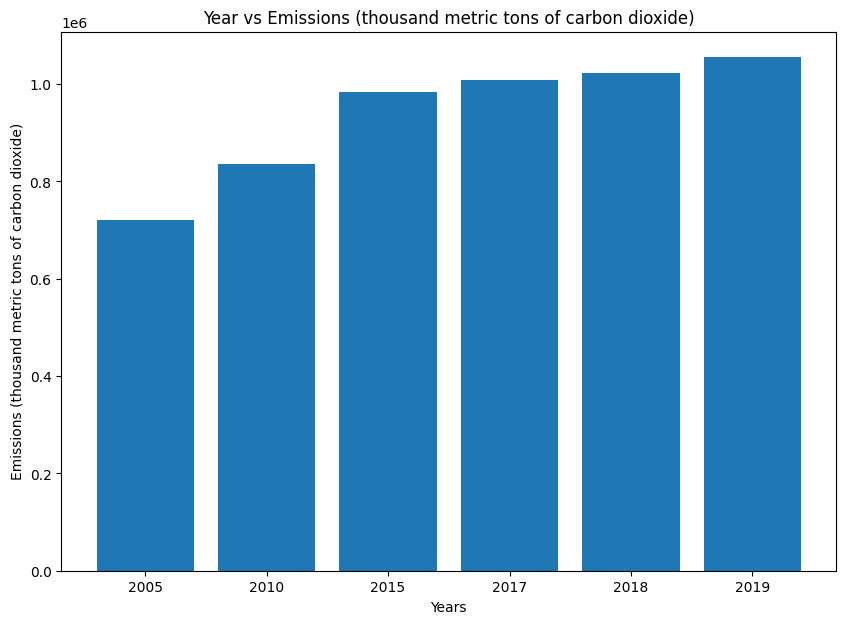

In [261]:
# Graph shows how the CO2 Emissions in Africa has been increasing gradually with time
# Also Note Energy Production Growth rate is not as fast as CO2 Emissions Growth rate, by looking at both the graphs

fig = plt.figure(figsize =(10, 7))
plt.bar(df4["Year"],df4["Emissions (thousand metric tons of carbon dioxide)"])
plt.xlabel('Years')
plt.ylabel("Emissions (thousand metric tons of carbon dioxide)")
plt.title('Year vs Emissions (thousand metric tons of carbon dioxide)')
plt.show()

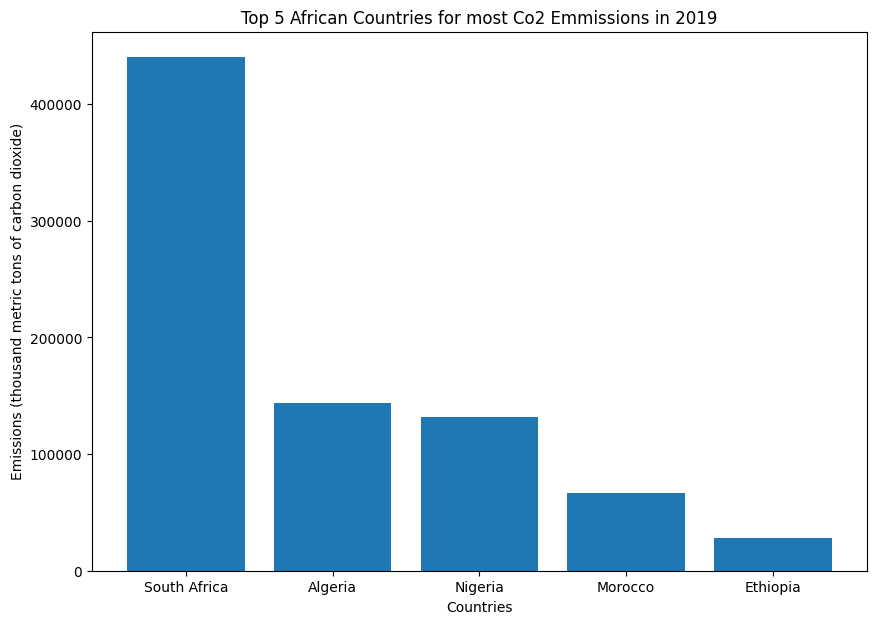

In [262]:
# Below graph shows Top 5 CO2 Emissions in Africa, Out of which South Africa is at top

df2 = co2_ener[ co2_ener['Year'].isin(["2019"])]
dff = df2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)'], ascending=False)
df3 = df2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)'], ascending=False).head(5)
dfothers = dff.tail(dff.shape[0] -5)
x = dfothers['Emissions (thousand metric tons of carbon dioxide)'].sum()
fig = plt.figure(figsize =(10, 7))
plt.bar(df3["Region/Country/Area"],df3["Emissions (thousand metric tons of carbon dioxide)"])
plt.xlabel('Countries')
plt.ylabel("Emissions (thousand metric tons of carbon dioxide)")
plt.title('Top 5 African Countries for most Co2 Emmissions in 2019')
plt.show()

In [263]:
dfothers.head()

,Region/Country/Area,Year,Emissions (thousand metric tons of carbon dioxide),Primary energy production (petajoules)
157,Tunisia,2019,26678,218
83,Kenya,2019,24338,772
145,Sudan,2019,20945,408
11,Angola,2019,20597,3639
77,Ghana,2019,19209,686


Text(0.5, 1.0, 'Top 5 African countries with most Emissions (thousand metric tons of carbon dioxide) and others')

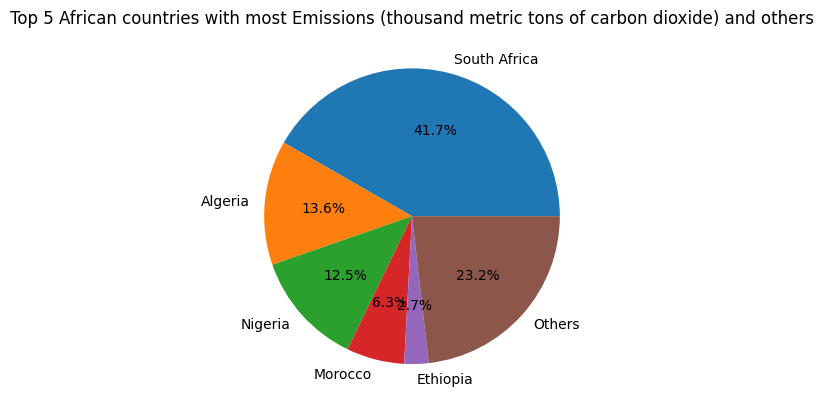

In [264]:
# Below Pie chart shows South Africa produces 41.7 % CO2 Emissions which is alot compare to other countries
# Top 5 produces nearly 80% while other countries produce 20%

top_5_emission_countries =  list(df3['Region/Country/Area'])
top_5_emission_countries.append("Others")
top_5_emission_countries_values =  list(df3['Emissions (thousand metric tons of carbon dioxide)'])
top_5_emission_countries_values.append(x)
plt.pie(top_5_emission_countries_values,labels =top_5_emission_countries, autopct='%1.1f%%' )
# plt.legend()
plt.title("Top 5 African countries with most Emissions (thousand metric tons of carbon dioxide) and others")

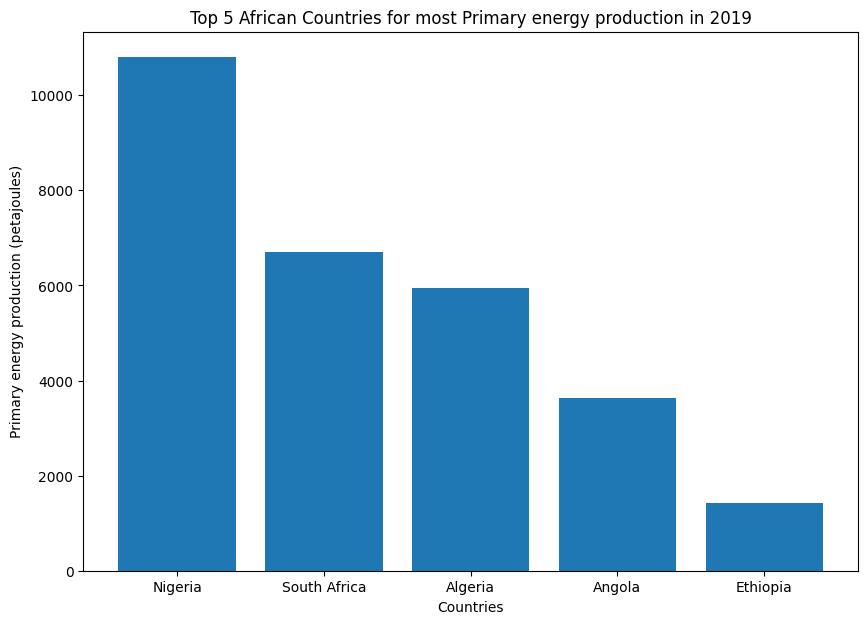

In [265]:
# Below graph shows Top 5 Energy production countries in Africa, Out of which Nigeria is at top
# Note that South Africa is highest in CO2 emissions but still produces around 60% of what Nigeria produces where as Nigeria emissions is
# even less than 30 % of South Africa CO2 emissions

df2.sort_values(by=['Primary energy production (petajoules)'], ascending=False)
df5 = df2.sort_values(by=['Primary energy production (petajoules)'], ascending=False).head(5)
fig = plt.figure(figsize =(10, 7))
dfothers = df2.tail(df2.shape[0] -5)
x = dfothers['Primary energy production (petajoules)'].sum()
plt.bar(df5["Region/Country/Area"],df5["Primary energy production (petajoules)"])
plt.xlabel('Countries')
plt.ylabel("Primary energy production (petajoules)")
plt.title('Top 5 African Countries for most Primary energy production in 2019')
plt.show()

Text(0.5, 1.0, 'Top 5 African countries with most Primary energy production (petajoules) and others')

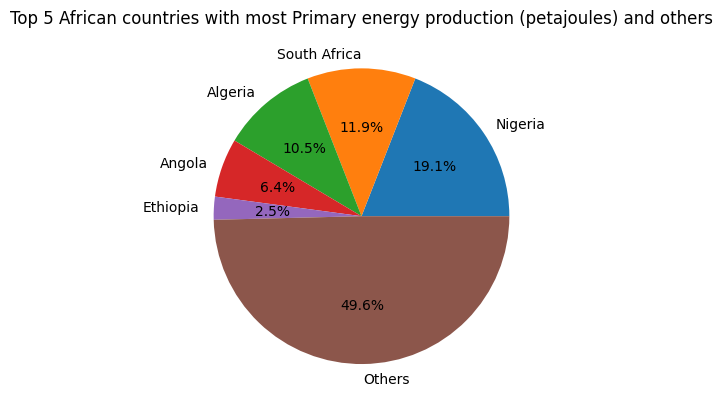

In [266]:
# Below Pie chart shows the percentage of enrgy production by top 5 and other coutries, out of which Nigeria is at top

top_5_emission_countries = list(df5['Region/Country/Area'])
top_5_emission_countries.append("Others")
top_5_emission_countries_values =  list(df5['Primary energy production (petajoules)'])
top_5_emission_countries_values.append(x)
plt.pie(top_5_emission_countries_values,labels = top_5_emission_countries, autopct='%1.1f%%')
# plt.legend()
plt.title("Top 5 African countries with most Primary energy production (petajoules) and others")

# total = sum(top_5_emission_countries_values)
# percentages = [(value / total) * 100 for value in top_5_emission_countries_values]


Nigeria most energy producing but less carbon emission than others.

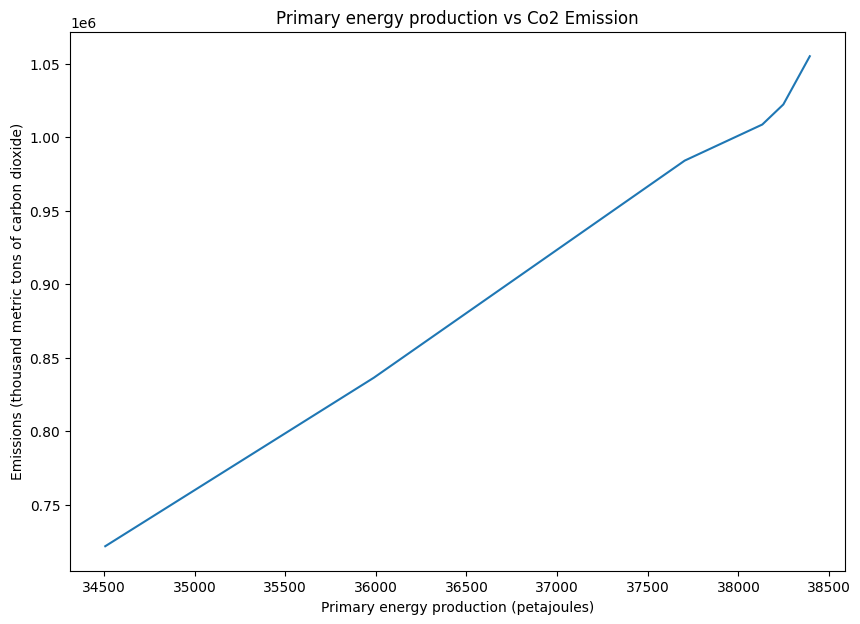

In [267]:
# Below line graph shows how CO2 Emissions increases when Energy production increases (overall i.e. irrespective of year and energy)

fig = plt.figure(figsize =(10, 7))
plt.plot(df4['Primary energy production (petajoules)'],df4['Emissions (thousand metric tons of carbon dioxide)'])
plt.xlabel('Primary energy production (petajoules)')
plt.ylabel('Emissions (thousand metric tons of carbon dioxide)')
plt.title('Primary energy production vs Co2 Emission')
plt.show()

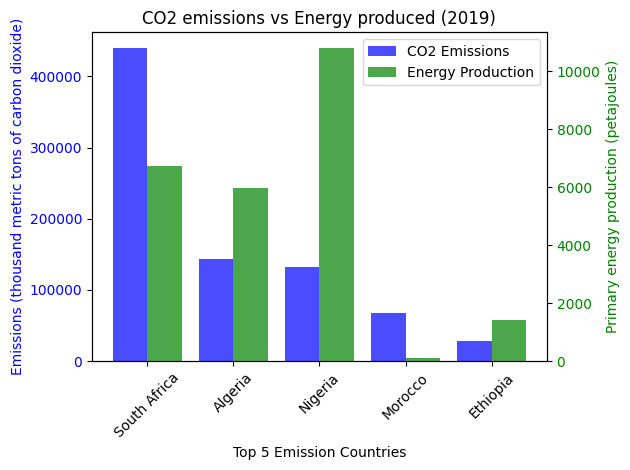

In [268]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
top_5_emission_countries =  list(df3['Region/Country/Area'])
values1 = df3['Emissions (thousand metric tons of carbon dioxide)']
values2 = df3['Primary energy production (petajoules)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_emission_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='CO2 Emissions', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Top 5 Emission Countries')
ax1.set_ylabel('Emissions (thousand metric tons of carbon dioxide)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Energy Production', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Primary energy production (petajoules)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_emission_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('CO2 emissions vs Energy produced (2019)')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')


# Show the plot
plt.tight_layout()
plt.show()

# CO2 Emission vs Energy Produced double bar grph shown below

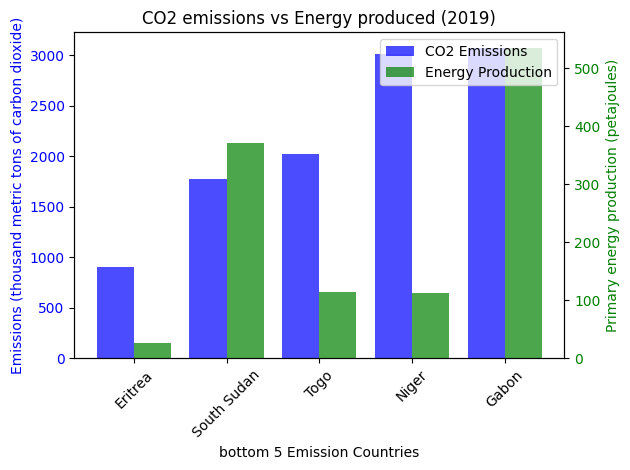

In [269]:
import matplotlib.pyplot as plt
import numpy as np
dff3 = df2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)']).head(5)
# Sample data
bottom_5_emission_countries_5_emission_countries =  list(dff3['Region/Country/Area'])
values1 = dff3['Emissions (thousand metric tons of carbon dioxide)']
values2 = dff3['Primary energy production (petajoules)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(bottom_5_emission_countries_5_emission_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='CO2 Emissions', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('bottom 5 Emission Countries')
ax1.set_ylabel('Emissions (thousand metric tons of carbon dioxide)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Energy Production', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Primary energy production (petajoules)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(bottom_5_emission_countries_5_emission_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('CO2 emissions vs Energy produced (2019)')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')


# Show the plot
plt.tight_layout()
plt.show()

In [270]:
co2_endang_2 = co2_endang[ co2_endang['Year'].isin(["2019"])]
co2_endang_2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)'], ascending=False)
co2_endang_3 = co2_endang_2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)'], ascending=False).head(5)
co2_endang_3

,Region/Country/Area,Year,Emissions (thousand metric tons of carbon dioxide),Threatened Species: Total (number)
91,South Africa,2019,440028,603
3,Algeria,2019,143586,145
83,Nigeria,2019,131777,372
63,Morocco,2019,66891,227
43,Ethiopia,2019,28027,178


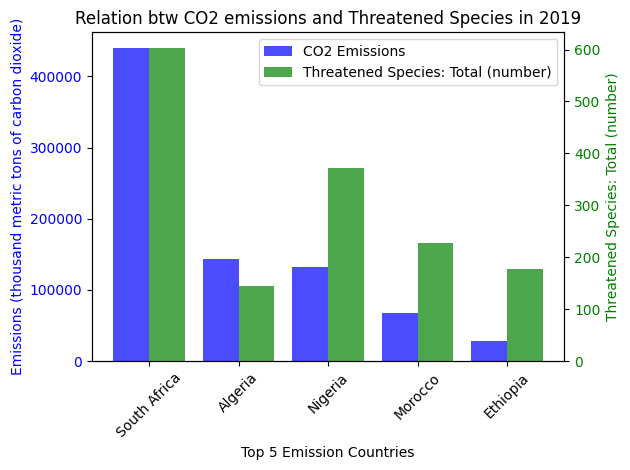

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
top_5_emission_countries =  list(co2_endang_3['Region/Country/Area'])
values1 = co2_endang_3['Emissions (thousand metric tons of carbon dioxide)']
values2 = co2_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_emission_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='CO2 Emissions', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Top 5 Emission Countries')
ax1.set_ylabel('Emissions (thousand metric tons of carbon dioxide)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_emission_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw CO2 emissions and Threatened Species in 2019')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# CO2 Emission vs Threatened Species double bar grph shown below for Top 5 Emission countries

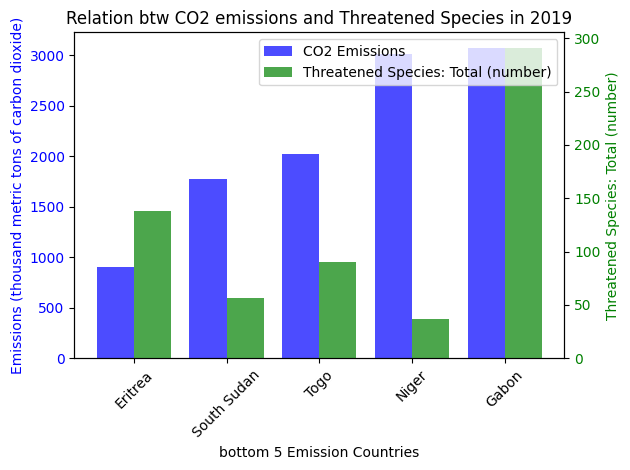

In [272]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
co2_endang_3 = co2_endang_2.sort_values(by=['Emissions (thousand metric tons of carbon dioxide)']).head(5)
bottom_5_emission_countries =  list(co2_endang_3['Region/Country/Area'])
values1 = co2_endang_3['Emissions (thousand metric tons of carbon dioxide)']
values2 = co2_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(bottom_5_emission_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='CO2 Emissions', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('bottom 5 Emission Countries')
ax1.set_ylabel('Emissions (thousand metric tons of carbon dioxide)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(bottom_5_emission_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw CO2 emissions and Threatened Species in 2019')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [273]:
pop_endang_2 = pop_endang[ pop_endang['Year'].isin(["2022"]) ]
pop_endang_3 = pop_endang_2.sort_values( by = ['Population mid-year estimates (millions)'], ascending=False ).head(5)
pop_endang_3
# pop_endang.groupby('Year').count()

,Region/Country/Area,Year,Population mid-year estimates (millions),Population density,Threatened Species: Total (number)
83,Nigeria,2022,218.54,240.0,455
43,Ethiopia,2022,123.38,123.4,228
31,Dem. Rep. of the Congo,2022,99.01,43.7,709
108,United Rep. of Tanzania,2022,65.50,73.9,1464
91,South Africa,2022,59.89,49.1,796


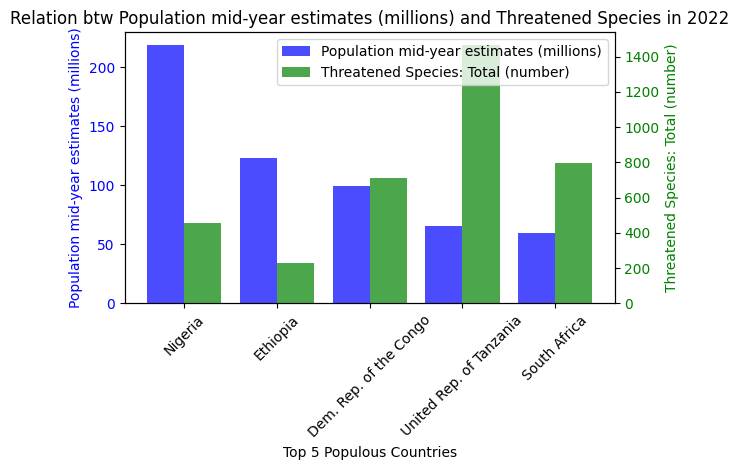

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

top_5_pop_countries =  list(pop_endang_3['Region/Country/Area'])
values1 = pop_endang_3['Population mid-year estimates (millions)']
values2 = pop_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Population mid-year estimates (millions)', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Top 5 Populous Countries')
ax1.set_ylabel('Population mid-year estimates (millions)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Population mid-year estimates (millions) and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Population vs Threatened Species double bar grph shown below for Top 5 populous countries

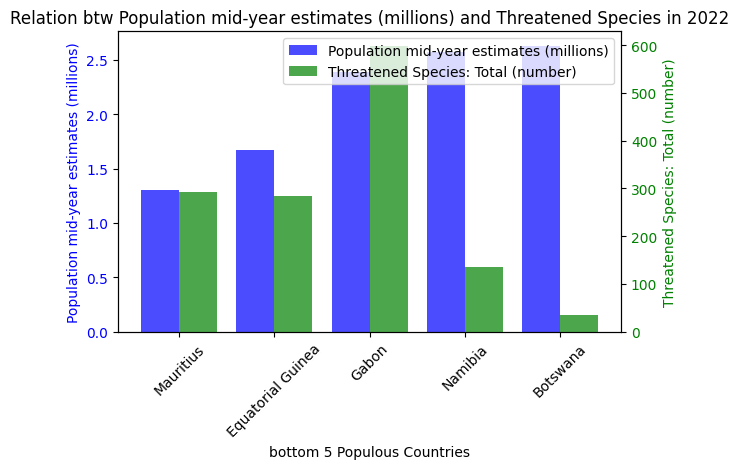

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
pop_endang_3 = pop_endang_2.sort_values( by = ['Population mid-year estimates (millions)']).head(5)
bottom_5_pop_countries =  list(pop_endang_3['Region/Country/Area'])
values1 = pop_endang_3['Population mid-year estimates (millions)']
values2 = pop_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(bottom_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Population mid-year estimates (millions)', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('bottom 5 Populous Countries')
ax1.set_ylabel('Population mid-year estimates (millions)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(bottom_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Population mid-year estimates (millions) and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [276]:
pop_endang_2 = pop_endang[ pop_endang['Year'].isin(["2022"]) ]
pop_endang_3 = pop_endang_2.sort_values( by = ['Population density'], ascending=False ).head(5)
pop_endang_3
# pop_endang.groupby('Year').count()

,Region/Country/Area,Year,Population mid-year estimates (millions),Population density,Threatened Species: Total (number)
59,Mauritius,2022,1.30,640.1,292
83,Nigeria,2022,218.54,240.0,455
100,Togo,2022,8.85,162.7,128
51,Ghana,2022,33.48,147.1,294
43,Ethiopia,2022,123.38,123.4,228


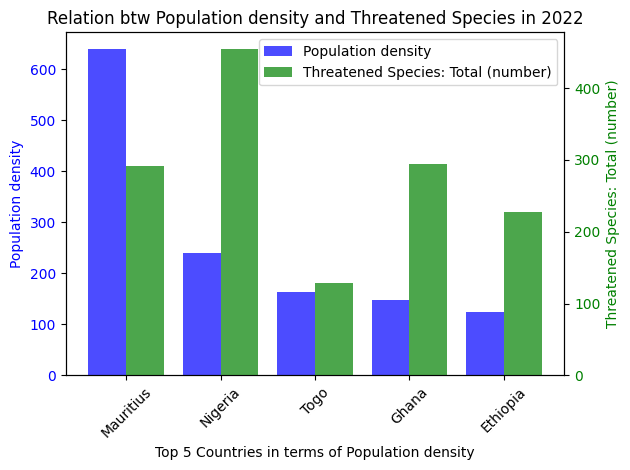

In [277]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

top_5_pop_countries =  list(pop_endang_3['Region/Country/Area'])
values1 = pop_endang_3['Population density']
values2 = pop_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Population density', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Top 5 Countries in terms of Population density')
ax1.set_ylabel('Population density', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Population density and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Population density vs Threatened Species double bar grph shown below for Top 5 Population density countries

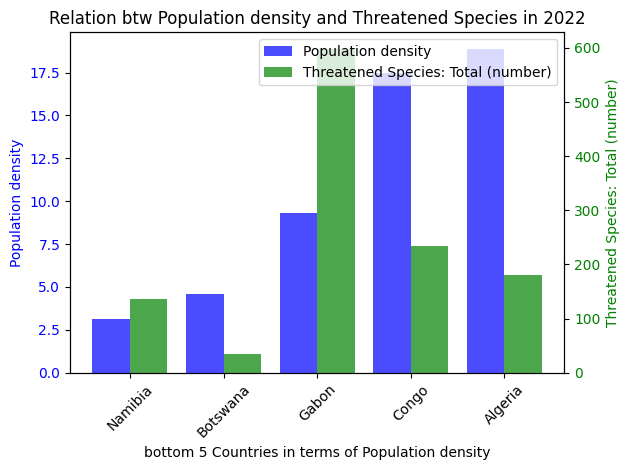

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
pop_endang_3 = pop_endang_2.sort_values( by = ['Population density'] ).head(5)
bottom_5_pop_countries =  list(pop_endang_3['Region/Country/Area'])
values1 = pop_endang_3['Population density']
values2 = pop_endang_3['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(bottom_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Population density', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('bottom 5 Countries in terms of Population density')
ax1.set_ylabel('Population density', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(bottom_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Population density and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()